# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [326]:
import pandas as pd
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [327]:
df = pd.read_csv("craftcans.csv",
                na_values=[0, "NA", "NaN", "Does not apply"])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [328]:
df.shape
# 2416 rows

(2416, 7)

In [329]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [330]:
# we identify how many different beers each brewery produce
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [332]:
df.ABV.value_counts().head(5)

5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [333]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [334]:
# hey dataframe
# give me ABV column
# and replace some values from it
# and then save the changes into the dataframe

df.ABV = df.ABV.str.replace("%", "", regex=False)
df.ABV.value_counts().head()

5.00    215
5.50    158
6.00    125
6.50    123
5.20    107
Name: ABV, dtype: int64

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [335]:
# let's turn the strings into numbers
df.ABV = df.ABV.astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [336]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

<AxesSubplot:>

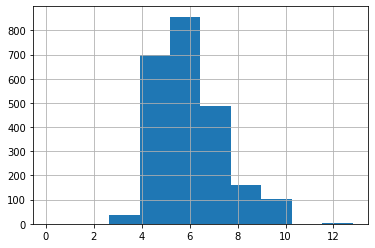

In [337]:
# with an histogram we can show how much alcohol most of the beers have
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [338]:
df.ABV.isnull().value_counts()
# 68 rows don't have ABV value

False    2348
True       68
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [339]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [340]:
# find all of the rows where Location is "Brooklyn, NY"
df[df.Location == "Brooklyn, NY"]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [341]:
df.Brewery[df.Location == "Brooklyn, NY"].value_counts()
# Sixpoint Craft Ales Brewery

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [342]:
df.Style[df.Brewery == "Sixpoint Craft Ales"].value_counts().head(5)

American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [343]:
# There are 6 rows with no Location value
#df[df.Location.isna()]

In [344]:
# Remove all of the rows that are missing data from the 'Location' column
df = df.dropna(subset=['Location'])

In [345]:
df.Brewery[df.Location.str.contains("NY")].value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Chatham Brewing                   2
Montauk Brewing Company           2
Bomb Beer Company                 2
Upstate Brewing Company           2
Newburgh Brewing Company          1
Southampton Publick House         1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: Brewery, dtype: int64

### Now *count* all of the breweries in New York state

In [346]:
# We can eyeball 16 different breweries in NY State
df.Brewery[df.Location.str.contains("NY")].nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [347]:
# first, we eliminate NA / NaN values from Style column
df = df.dropna(subset=['Style'])
df.Style[df.Style.str.contains("IPA")].value_counts()

American IPA                      424
American Double / Imperial IPA    105
Belgian IPA                        18
English India Pale Ale (IPA)       13
American White IPA                 11
Name: Style, dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [348]:
df.IBUs.dtype

dtype('float64')

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [349]:
df.IBUs.mean()

42.73984319315752

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

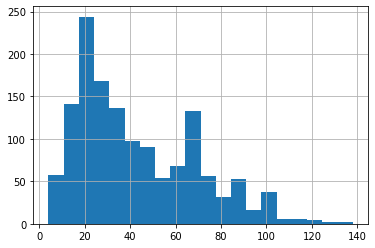

In [350]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [351]:
df.IBUs.describe()

count    1403.000000
mean       42.739843
std        25.962692
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [352]:
# list of beers
df.Beer[df.IBUs > 64].value_counts()

Dale's Pale Ale                    6
Dagger Falls IPA                   3
Gandhi-Bot Double IPA              2
Modus Hoperandi                    2
Heady Topper                       2
                                  ..
Quarter Mile Double IPA            1
Squatters Hop Rising Double IPA    1
American India Red Ale             1
Truth                              1
Gordon Ale (2009)                  1
Name: Beer, Length: 329, dtype: int64

In [353]:
# Total number of beers with high IBUs
df.Beer[df.IBUs > 64].nunique()

329

## List all of the beers with IBUs below the 25th percentile

In [354]:
df.Beer[df.IBUs < 21].value_counts()

Nonstop Hef Hop                           12
Longboard Island Lager                     4
#9                                         2
Lake House                                 2
Black Star Double Hopped Golden Lager      2
                                          ..
Seiche Scottish Ale                        1
Whitecap Wit                               1
Gutch English Style Mild Ale               1
Black Market Hefeweizen                    1
Hell or High Watermelon Wheat              1
Name: Beer, Length: 306, dtype: int64

In [355]:
# Total number of beers with low IBUs
df.Beer[df.IBUs < 21].nunique()

306

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [356]:
df.groupby('Style').IBUs.median().head(53)

Style
Abbey Single Ale                      22.0
Altbier                               36.5
American Adjunct Lager                 9.0
American Amber / Red Ale              31.0
American Amber / Red Lager            23.0
American Barleywine                   96.0
American Black Ale                    73.0
American Blonde Ale                   20.0
American Brown Ale                    26.0
American Dark Wheat Ale               25.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Double / Imperial Stout      51.0
American IPA                          69.0
American India Pale Lager             65.0
American Malt Liquor                   NaN
American Pale Ale (APA)               44.0
American Pale Lager                   18.5
American Pale Wheat Ale               20.0
American Pilsner                      21.5
American Porter                       31.0
American Stout                        40.0
American Strong Ale                   70.0
Ameri

<AxesSubplot:xlabel='Style'>

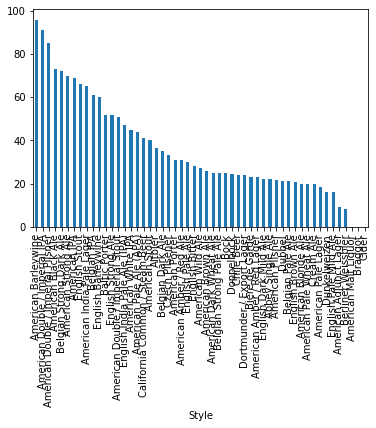

In [357]:
df.groupby('Style').IBUs.median().head(53).sort_values(ascending =False).plot(kind='bar')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [359]:
# Most common 5 styles of high-IBU beer
df.Style[df.IBUs > 64].value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [360]:
# Most common 5 styles of low-IBU beer
df.Style[df.IBUs < 21].value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [371]:
wheat_beers = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]
wheat_beers.IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

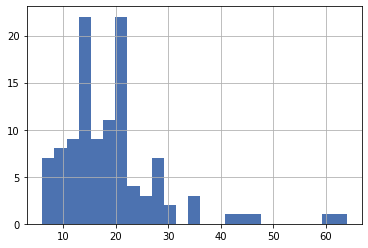

In [372]:
wheat_beers.IBUs.hist(bins=25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [373]:
IPA_beers = df[df.Style.str.contains("IPA")]
IPA_beers.IBUs.mean()

71.94897959183673

<AxesSubplot:>

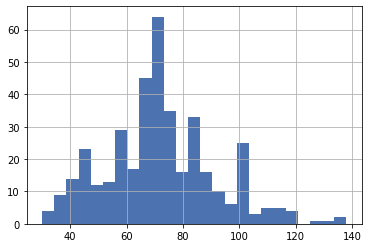

In [374]:
IPA_beers.IBUs.hist(bins=25)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

In [378]:
#import matplotlib.pyplot as plt
#plt.style.use('seaborn-deep')

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [366]:
wheat_beers.ABV.mean()

5.043715846994536

In [367]:
IPA_beers.ABV.mean()

6.879285714285714

In [ ]:
## Both have a similar alcohol percentage
# IPAs are sligly higher on average

## Good work!

If you made it this far you deserve a drink.

In [ ]:
#yes, even when it's 11am